## Text Analytics -- Case Study: Martian Novel

### Highly Recommended: The graphs/plots in the notebook can be viewed using this link: [nbviewer](https://nbviewer.jupyter.org/github/AdeboyeML/Fight-Club-Movie-Script-Analysis/blob/master/FightClubNight1.ipynb), because the plotly graphs cannot be viewed in github.

- The aim of this text analytics project is to analyse a storybook or novel through extracting out the characters, their dialogue, words/verbs used them and also to check the locations and time occurences mentioned in the novel.

**Objectives:**

- Extract out the major characters, time occurences and geopolitical locations mentioned in the Novel.
- Extract out the interaction between the top characters if any, i.e. check if two characters appear in the same sentences
- Check the Gender distribution based on the characters in the Novel
- Extract out sentences where characters are the "Subject" and the corresponding "action verbs" used by them



### Steps Ahead:
- Convert PDF Book(.pdf) to Text Format (.txt) 
- Data Cleaning with Regex (Regular Expression)
- Entity Extraction with Spacy
- Data Visualization with Plotly:
    - Character, Geopolitical and Time occurence Visualizations
    - Gender Distribution charts
    - Character's Appearances Visualizations
- Dependency parsing -- to extract sentences where characters are the "Subject" of Sentences
- Character's action visualization


- Tools utilized: ***Spacy, NLTK, Ploty, Seaborn, Regex***
#### ***Note: All the codes are ran from the following python modules: pdf_to_txt.py, txt_extract.py, gender.py, text_plots.py, subj.py***

In [1]:

# plotly
from plotly.subplots import make_subplots
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px

#### PDF to Txt.format

In [11]:
# from pdf_to_txt import pdf_to_text

In [2]:
# pdfDir = r"C:\Users\Adeboye Adeniyi\Documents\filmscripts\pdfscripts/"
# txtDir = r'C:\Users\Adeboye Adeniyi\Documents\filmscripts\textscripts/'


In [3]:
# convert = pdf_to_text(pdfDir, txtDir)

In [4]:
# convert.convertMultiple()

In [3]:
from txt_extract import text_extract

In [5]:
txt = text_extract('./textscripts/Martian BOOK.pdf.txt')

In [6]:
text_data, df_chapter, df_sentences = txt.clean_text()

In [7]:
person, gpe, time = txt.extract_entities(df_chapter, df_sentences)

In [8]:
characters, refined_gpes = txt.remove_similar(person,gpe)

In [9]:
print(characters)

['Venkat', 'Lewis', 'Martinez', 'Johanssen', 'Beck', 'Teddy', 'Eva', 'Vogel', 'Mitch', 'Annie', 'Sol', 'Bruce', 'Watney', 'Mindy', 'Mdv', 'Cathy', 'Mark Watney', 'Jack', 'Hab', 'Guo Ming', 'Tim', 'Rich', 'Zhu Tao', 'Chuck', 'Mark', 'Schiapareli', 'Sojourner', 'Wel', 'Acidalia Planitia', 'Rtg', 'Evas', 'Irene', 'Arec', 'Kapoor', 'Mindy Park', 'Mike', 'Brendan', 'Al', 'Hermes', 'Iris', 'Mawrth Valis', 'Robert', 'Morris', 'Mitch Henderson', 'Rich Purnel', 'Arabia Terra', 'Annie Montrose', 'Marcus', 'Maurice', 'Keler', 'Taiyang Shen', 'Morse', 'Randal', 'Dr Beck', 'Stil', 'Poirot', 'Bruce Ng', 'Apolo', 'Disco', 'Dr Keler', 'Brendan Hutch', 'Dril', 'Marissa', 'David', 'Marth', 'Johanssen  ', 'Vogel  ', 'Agatha Christie', 'Hercule Poirot', 'Mark  ', 'Marcus Washington', 'Bruce  ', 'Ares Valis', 'Marty', 'Jesus', 'Elrond', 'Jpl', 'Rover', 'Roger', 'Morse Code', 'Dr Kapoor', 'Amy', 'Beth', 'Kiled', 'James Bond', 'Trouvelot', 'Marth Crater', 'Deneb', 'Timekeeper', 'Val']


In [10]:
#Count the amount of times entities appeared in the whole Novel
#Check how many chapters and sentences entities appear in 

count_xters, xters_chpts = txt.count(df_chapter, characters)
count_gpes, gpe_chpts = txt.count(df_chapter, refined_gpes)

In [12]:
from gender import gender_distribution

In [13]:
gd = gender_distribution(characters)

In [15]:
df_gender = gd.gender_types()

In [16]:
from text_plots import plot_results

In [17]:
plt = plot_results('Martian Novel')

In [18]:
plt.gender_plot(df_gender)

### - Entity Extraction and Visualization -- Person, GPE - Geopolitical locations, Time Ocuurences

In [19]:
plt.plot_entitycount(count_xters, 'Major Characters', px.colors.diverging.Spectral)

In [20]:
plt.plot_entitycount(count_gpes, 'Geopolitical Places', px.colors.cyclical.mygbm)

In [21]:
plt.plot_entitycount(time, 'Time occurences', px.colors.cyclical.Twilight)

In [22]:
plt.plot_ctper(xters_chpts, 'Major Character', px.colors.sequential.thermal)

In [23]:
plt.plot_ctper(gpe_chpts, 'Geopolitical places', px.colors.sequential.Sunset)

### - Character Appearances across the entire Novel

In [24]:
#Check the top 3 character's interaction with each other
top1_2, top2_3, top1_3 = plt.top3xters_interaction(characters)

In [25]:
top1_2

['Venkat', 'Lewis']

In [26]:
#Lets if the TOP 3 Characters interact within the Novel based on their appearance in the same sentence
#Also extract the sentence in which they occur in

top1_2_sent = plt.extract_sentences_plot(df_sentences, top1_2, ['blue', 'pink'])

      Lewis  Venkat                                           Contents
2170    1.0     1.0   You dont think Commander Lewis cant handle th...


In [27]:
top2_3_sent = plt.extract_sentences_plot(df_sentences, top2_3, ['green', 'purple'])

      Lewis  Martinez                                           Contents
3414    1.0       1.0   Only the European Union flag on Vogel  should...
3582    1.0       1.0   what about the proximity radar? Lewis said, c...
3719    1.0       1.0   Lewis sat in the adjacent seat while Vogel an...
3745    1.0       1.0                           Martinez looked to Lewis
5603    1.0       1.0   so, Martinez said, we are talking about going...


In [19]:
#top1_3_sent = plt.extract_sentences_plot(df_sentences, top1_3, ['orange', 'purple'])

In [28]:
print(characters)

['Venkat', 'Lewis', 'Martinez', 'Johanssen', 'Beck', 'Teddy', 'Eva', 'Vogel', 'Mitch', 'Annie', 'Sol', 'Bruce', 'Watney', 'Mindy', 'Mdv', 'Cathy', 'Mark Watney', 'Jack', 'Hab', 'Guo Ming', 'Tim', 'Rich', 'Zhu Tao', 'Chuck', 'Mark', 'Schiapareli', 'Sojourner', 'Wel', 'Acidalia Planitia', 'Rtg', 'Evas', 'Irene', 'Arec', 'Kapoor', 'Mindy Park', 'Mike', 'Brendan', 'Al', 'Hermes', 'Iris', 'Mawrth Valis', 'Robert', 'Morris', 'Mitch Henderson', 'Rich Purnel', 'Arabia Terra', 'Annie Montrose', 'Marcus', 'Maurice', 'Keler', 'Taiyang Shen', 'Morse', 'Randal', 'Dr Beck', 'Stil', 'Poirot', 'Bruce Ng', 'Apolo', 'Disco', 'Dr Keler', 'Brendan Hutch', 'Dril', 'Marissa', 'David', 'Marth', 'Johanssen  ', 'Vogel  ', 'Agatha Christie', 'Hercule Poirot', 'Mark  ', 'Marcus Washington', 'Bruce  ', 'Ares Valis', 'Marty', 'Jesus', 'Elrond', 'Jpl', 'Rover', 'Roger', 'Morse Code', 'Dr Kapoor', 'Amy', 'Beth', 'Kiled', 'James Bond', 'Trouvelot', 'Marth Crater', 'Deneb', 'Timekeeper', 'Val']


In [29]:
#Extract Sentences where characters were mentioned in the Novel
UnamedNarrator_sent = plt.extract_sentences_plot(df_sentences, 'I', ['#A040A0'])

     I                                           Contents
0  1.0           Log Entry: Sol 6 I am pretty much fucked
4  1.0                I dont even know who will read this
5  1.0              I guess someone wil find it eventualy
7  1.0                For the record I didnt die on Sol 6
8  2.0   Certainly the rest of the crew thought I did,...


In [31]:
#Extract Sentences where characters were mentioned in the Novel
Venkat_sent = plt.extract_sentences_plot(df_sentences, characters[0], ['green'])

      Venkat                                           Contents
1206     1.0   Why doesnt Roscoe just go to the Duke farm an...
1216     1.0   During preparation for the service, they had ...
1221     1.0                             Venkat swiveled around
1233     1.0                              sure, Venkat shrugged
1237     1.0                                   yes, Venkat said


In [32]:
#Extract Sentences where characters were mentioned in the Novel
Lewis_sent = plt.extract_sentences_plot(df_sentences, characters[1], ['#B8A038'])

     Lewis                                           Contents
23     1.0                      Commander Lewis was in charge
545    1.0   I rifled through Commander Lewis  stuff until...
547    1.0                         Time to see what Lewis had
786    1.0   In addition to being our commander, Lewis was...
961    1.0   Commander Lewis was the last one to use this ...


In [33]:
#Extract Sentences where characters were mentioned in the Novel
Martinez_sent = plt.extract_sentences_plot(df_sentences, characters[2], ['#EE99AC'])

     Martinez                                           Contents
658       1.0   During the most terrifying 23 minutes of my l...
663       1.0   Several staged sets of chutes deployed automa...
667       1.0   Thanks, Martinez You may have saved my life N...
819       1.0                      Martinez is a devout catholic
822       1.0   I am sure Nasa gave him shit about it, but I ...


In [34]:
#Extract Sentences where characters were mentioned in the Novel
Johanssen_sent = plt.extract_sentences_plot(df_sentences, characters[3], ['#F08030'])

      Johanssen                                           Contents
88          1.0   The last thing I remember was seeing Johansse...
423         1.0   But after things settled down a bit, and I ha...
546         1.0   Everyone got to bring whatever digital entert...
762         1.0   With some thread torn out of a uniform sorry,...
1045        1.0            Johanssen  was outwitting the regulator


### Dependency parsing in Spacy
### - Extraction of Sentences where characters are the "Subjects" and their corresponding action verbs

In [36]:
from subj import subjects

In [37]:
sub = subjects(text_data, characters)

In [38]:
#Extract sentences where characters are the "Subjects"
span_doc, df_spans = sub.subject_action()

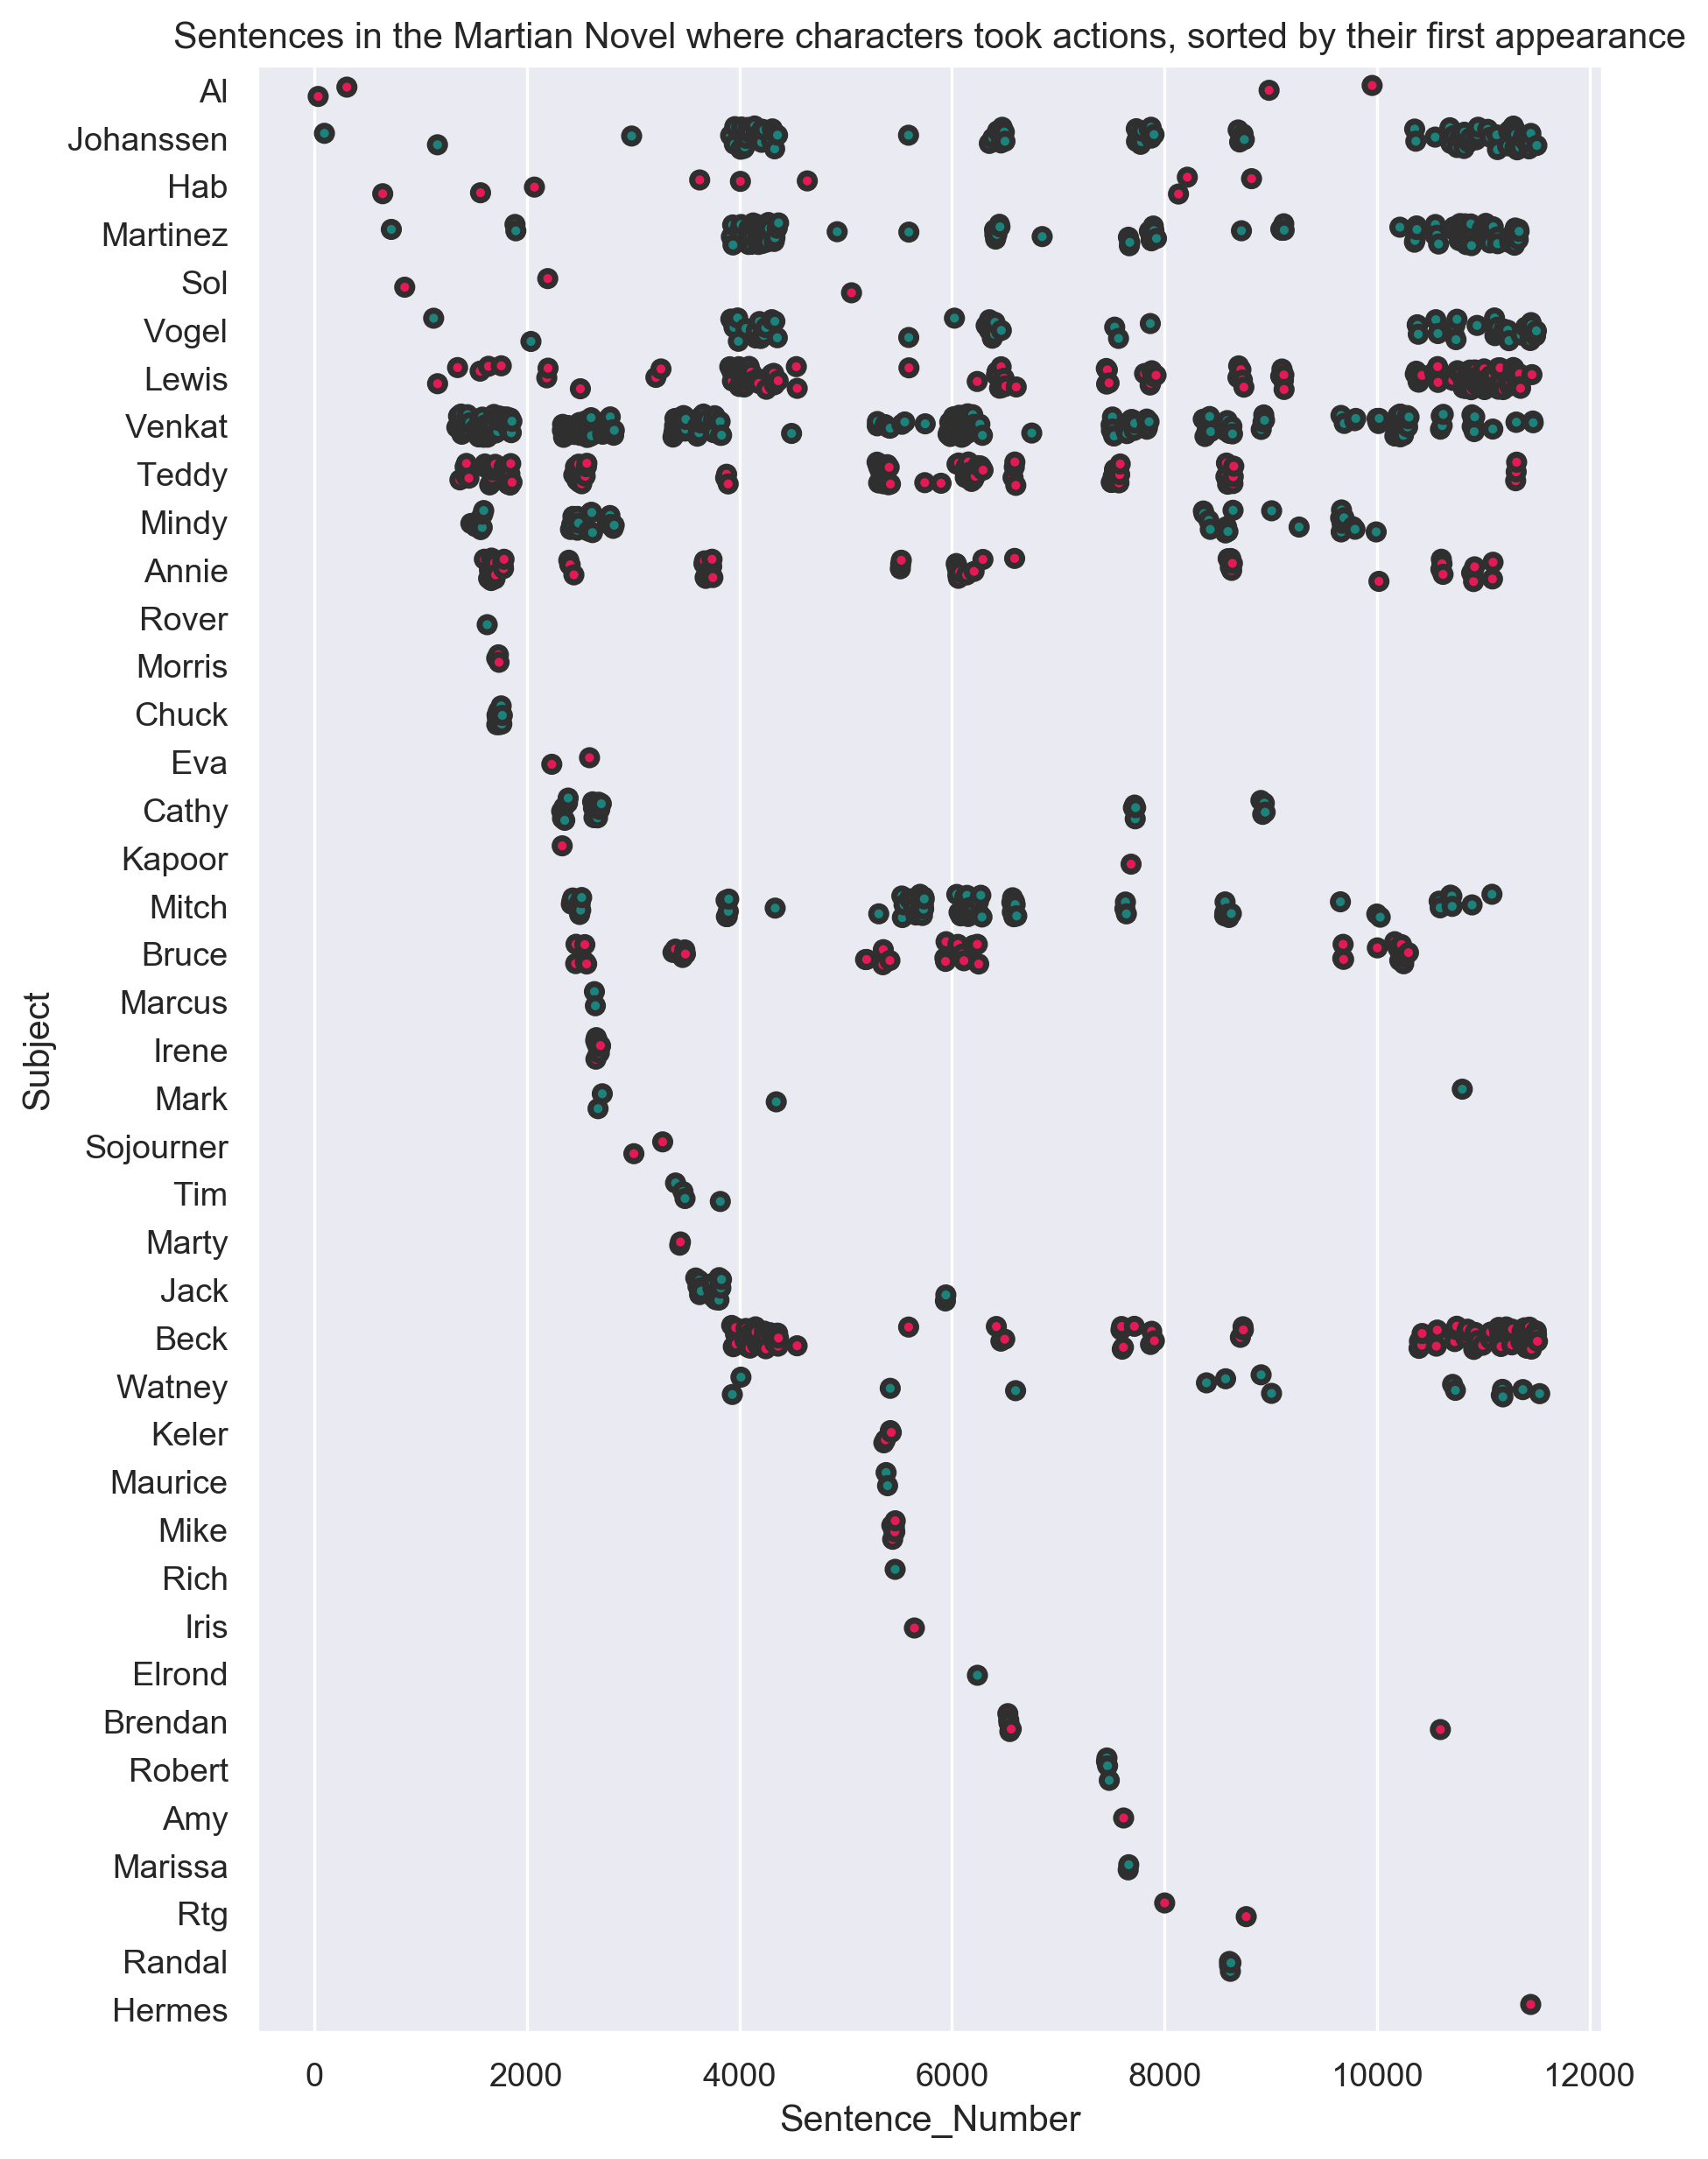

In [39]:
plt.action_plot(df_spans)

In [40]:
#Extract most common verbs and plot for all the Major characters --- Decide the Number of Top Verbs to extract/visualize
most_common_verbs = plt.most_common(df_spans, 5)

In [41]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[0], 20, px.colors.cyclical.HSV)

In [42]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[1], 20, px.colors.sequential.haline)

In [43]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[2], 20, px.colors.sequential.Blackbody)

In [44]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[3], 20, px.colors.diverging.PRGn)

### Summary:

- Spacy's NER (Named Entity Recognition) is not quite optimized for Entity extraction from Novels, as you observed there were a lot misclassification of entities that we had to use another technique to deal with, but still there were these error in classification still persisted.


- The next step will be to look at the sentences where specific characters were mentioned and perform various analyses on them such as Sentiment analysis, document similarity between different characters to compare and contrast, etc.,


- Also, these analyses could be useful for film adaptation, in the sense that it gives a screen writer a sense of the major characters (including the unamed narrator) that are needed for the movie if the novel is to be adapted.